# IMPORTING ALL THE PACKAGES 

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [561]:
pd.__version__

'1.0.1'

### Importing the dataset and the name of each columns

In [569]:
df = pd.read_csv("iris.data") 
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.count()

sepal_length    149
sepal_width     149
petal_length    149
petal_width     149
class           149
dtype: int64

In [570]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Looking out for null/nan values

In [572]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [573]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

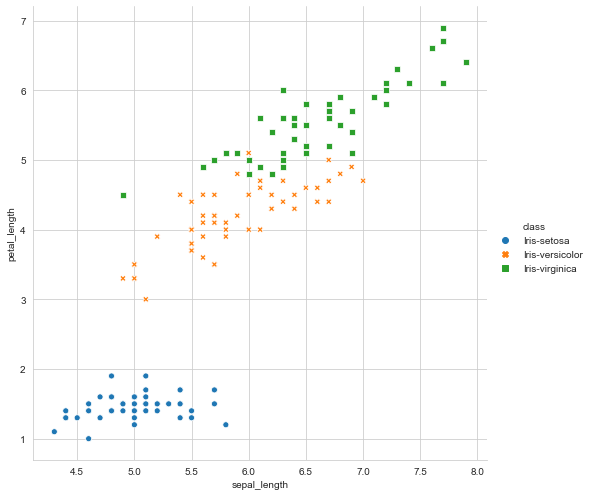

In [574]:
sns.relplot(x="sepal_length", y="petal_length", hue="class", height=7, style='class',  data=df )

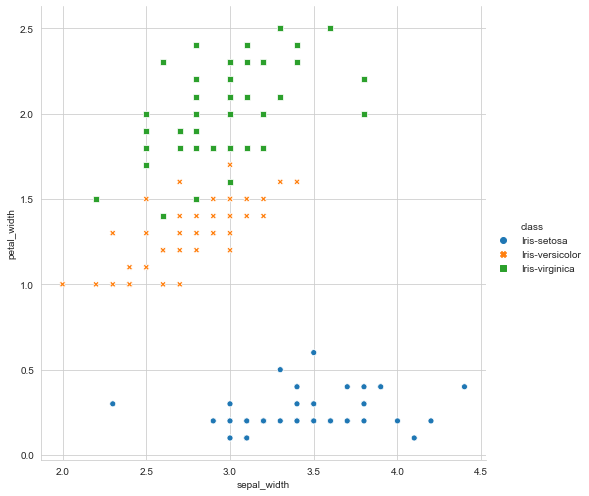

In [575]:
sns.relplot(x="sepal_width", y="petal_width", hue="class", height=7, style='class',  data=df )

### Converting the object vales to number

In [576]:
for data in df:
    df['class']= df['class'].replace('Iris-setosa', '0' )
    df['class']= df['class'].replace('Iris-versicolor', '1' )
    df['class']= df['class'].replace('Iris-virginica', '2' )
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


### Spliting the dataset into dependant and non-dependant 

In [577]:
X = df.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [578]:
y = df.iloc[:,-1:]
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


###  Spliting the dataset into training and test set

In [579]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [580]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
133,6.1,2.6,5.6,1.4
109,6.5,3.2,5.1,2.0
59,5.0,2.0,3.5,1.0
80,5.5,2.4,3.7,1.0
7,4.4,2.9,1.4,0.2
104,7.6,3.0,6.6,2.1
140,6.9,3.1,5.1,2.3
95,5.7,2.9,4.2,1.3
118,6.0,2.2,5.0,1.5
84,6.0,3.4,4.5,1.6


In [581]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
27,5.2,3.4,1.4,0.2
97,5.1,2.5,3.0,1.1
96,6.2,2.9,4.3,1.3
69,5.9,3.2,4.8,1.8
18,5.1,3.8,1.5,0.3
...,...,...,...,...
9,5.4,3.7,1.5,0.2
103,6.5,3.0,5.8,2.2
67,6.2,2.2,4.5,1.5
117,7.7,2.6,6.9,2.3


In [582]:
y_test

,class
133,2
109,2
59,1
80,1
7,0
104,2
140,2
95,1
118,2
84,1


In [583]:
y_train

,class
27,0
97,1
96,1
69,1
18,0
...,...
9,0
103,2
67,1
117,2


###  Using the Logistic regression model to build the model

In [584]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\AFEX ANALYTICS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AFEX ANALYTICS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Getting the predicted value for an entity

In [585]:
y_pred = classifier.predict([[5.9,3.0,5.1,1.8]])
y_pred

array(['2'], dtype=object)

### Getting the predicted values for all the test values, and comparing it with its real values

In [586]:
y_pred = (classifier.predict(X_test))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))
#np.set_printoptions(precision =0)

[['2' '2']
 ['2' '2']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['2' '2']
 ['2' '2']
 ['1' '1']
 ['1' '2']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['1' '2']
 ['2' '2']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['1' '1']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['2' '2']]


### The confussion matrix and the accuracy percentage of the model

In [587]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]


0.9333333333333333

# USING DECISION TREE FOR THE MODEL

In [589]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state= 0, criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [592]:
y_predDT = classifier.predict([[5.9,3.0,5.1,1.8]])
y_predDT

array(['2'], dtype=object)

In [593]:
y_predDT = (classifier.predict(X_test))
print(np.concatenate((y_predDT.reshape(len(y_predDT),1), y_test.values.reshape(len(y_test),1)),1))

[['1' '2']
 ['2' '2']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['2' '2']
 ['2' '2']
 ['1' '1']
 ['1' '2']
 ['2' '1']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['1' '2']
 ['2' '2']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['0' '0']
 ['1' '1']
 ['0' '0']
 ['1' '1']
 ['1' '1']
 ['1' '1']
 ['0' '0']
 ['0' '0']
 ['2' '2']]


### Checking the metrics of the decision tree

In [595]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predDT)
print(cm)
accuracy_score(y_test, y_predDT)

[[12  0  0]
 [ 0  9  1]
 [ 0  3  5]]


0.8666666666666667